In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [12]:
noise_scale = 100
number_of_samples = 50
mutation_rate = 0.1
mutation_amount = 0.002
crossover_rate = 0.1
num_epochs = 20

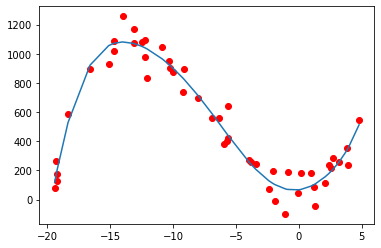

In [3]:
x = 25*(np.random.rand(number_of_samples, 1) -0.8)
x = np.expand_dims(np.sort(np.squeeze(x)), axis=1)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)

polyn = np.poly1d(np.squeeze(np.polyfit(np.squeeze(x),y,8)))
plt.figure(noise_scale)
plt.plot(x,y,"ro",x,polyn(x))

In [4]:
pop = np.random.rand(100, 6)*40

In [5]:
def mse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean()

def predict(coeffs, x):
    return coeffs[0]*(x**5)+coeffs[1]*(x**4)+coeffs[2]*(x**3)+coeffs[3]*(x**2)+coeffs[4]*x+coeffs[5]

def get_err(population: list):
    L = []
    for alg in population:
        hold = 0
        for inp in x:
            hold += mse(predict(alg, inp), y)
        L += [hold]
    return L

In [6]:
print(get_err(pop))

[2669825469596714.0, 3.289765608444077e+16, 1.0330926703707466e+16, 3.845701341509616e+16, 3.3081897249835364e+16, 4.14192802122853e+16, 1.9311004369090628e+16, 7438783319145368.0, 1741866041368.2957, 1.8952952882644376e+16, 3.367771143460405e+16, 1.1152927571286836e+16, 2.92059479128e+16, 763592674757.125, 5.662866142286751e+16, 4.449932786471483e+16, 2998032770720596.5, 4.920064456074986e+16, 4.622695185262318e+16, 2.862793191632296e+16, 2.345225054895598e+16, 4.469210192454022e+16, 3331194601947806.0, 4174486615181127.0, 2.555573949029354e+16, 4.429806933721161e+16, 33165894574215.637, 4750649137911899.0, 3.6416110844303016e+16, 204989852763217.12, 1557903815747051.5, 5.497806479573624e+16, 1.8788039863557252e+16, 2730890261403253.0, 5.076666826979716e+16, 1.0961464897302358e+16, 5.505948961555654e+16, 3.5929392501598956e+16, 3429042200518.3516, 1.3546293450224376e+16, 2.819305299775995e+16, 6805325483684940.0, 492049020479014.94, 877935186632496.2, 3.2742462089013948e+16, 171040474

In [7]:
idxs = np.argpartition(get_err(pop), 1)
print(idxs[:10])
print(get_err(pop)[0])
print(get_err(pop)[idxs[0]])
print(get_err(pop)[idxs[1]])
print(pop[idxs[:10]])

[80 13  2  3  4  5  6  7  8  9]
2669825469596714.0
600092550362.4529
763592674757.125
[[ 0.07197876  5.62084982 35.2303951   1.09658042  2.89141919  8.86084421]
 [ 1.45150079 26.72797883  3.43644405  5.40354507 38.06438633 31.39280147]
 [18.03048921 24.14362574  3.5857032   8.34019432 36.80713817  6.92075859]
 [33.75075661 27.14435254  3.33968985  4.48706129 12.61364719  7.10530379]
 [31.01043355 20.52514541 17.87036435  9.17087674 19.53231082 25.96919617]
 [34.0315251   9.57098672  1.3426554   5.97529144  8.47738186 18.72310152]
 [24.86679344 37.68003558 17.04689791  6.57992827 18.76088402 26.73212897]
 [14.71852178 11.00383867 29.01679187 39.19673338 31.93915488 36.93217624]
 [ 0.38240683  4.7484951  32.80356346 36.08710199 10.19666003  9.27089495]
 [22.77678467  2.2278879   6.44203942 11.5845625  21.61656172 17.66549622]]


In [8]:
def train_step(pop):
    idxs = np.argpartition(get_err(pop), 1)
    successful = np.array(pop[idxs[:10]])
    for i in range(10, 100):
        hold = np.copy(successful[i%10])
        if random.uniform(0, 1) < mutation_rate:
            ind = random.randint(0, 5)
            hold[ind] += random.uniform(-mutation_amount, mutation_amount)
        mate_ind = random.randint(0, 9)
        for val in range(len(hold)):
            if random.uniform(0, 1) < crossover_rate:
                hold[val] = successful[mate_ind][val]
        successful = np.concatenate((successful, np.array([hold])), axis=0)
    return successful

In [9]:
#print(pop)
#print(train_step(pop))

[0.01399766 0.35357599 0.7157947  0.30430068 0.20332896 0.1095424 ]


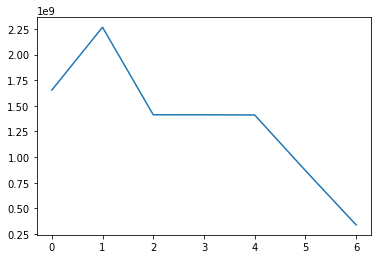

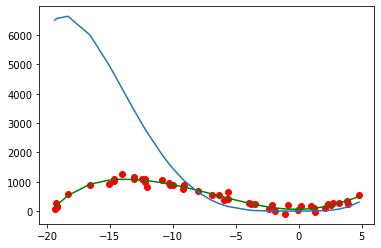

In [13]:
def train(pop):
    epoch_list = []#[i for i in range(0, num_epochs)]
    smallest_loss = []
    i=0
    while get_err(pop)[idxs[0]] > 500000000:
        epoch_list += [i]
        i+=1
        pop = train_step(pop)
        smallest_loss += [get_err(pop)[idxs[0]]]
    print(pop[0])
    plt.plot(epoch_list, smallest_loss)
    plt.show()
    
    polyn = np.poly1d(np.squeeze(np.polyfit(np.squeeze(x),y,6)))
    plt.plot(x,y,"ro",x,polyn(x),"g",x,predict(pop[0], x))
    plt.show()
    return pop

pop = np.random.rand(100, 6)
pop = train(pop)